# Read Data

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


In [69]:
# Load your dataset
data = pd.read_csv('covid_factTable.csv')

In [70]:
data.head(10)

,dateid,vacid,covidid,date,province,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,1,1,1,2021-01-02,BC,53162,42129,901,17510,0,0,0,0,0,0,0,0
1,1,2,2,2021-01-02,AB,104633,84827,1267,14244,0,0,0,0,0,0,0,0
2,1,3,3,2021-01-02,SK,15844,12975,158,3722,0,0,0,0,0,0,0,0
3,1,4,4,2021-01-02,MB,25026,19789,678,3540,2,0,0,0,0,0,0,0
4,1,5,5,2021-01-02,ON,193960,160526,4905,33191,0,0,0,0,0,0,0,0
5,1,6,6,2021-01-02,QC,204101,172047,7966,28691,1,0,0,0,0,0,0,0
6,1,7,7,2021-01-02,NL,390,372,4,1785,0,0,0,0,0,0,0,0
7,1,8,8,2021-01-02,NB,611,568,9,2905,0,0,0,0,0,0,0,0
8,1,9,9,2021-01-02,NS,1497,1399,65,2596,0,0,0,0,0,0,0,0
9,1,10,10,2021-01-02,PE,97,89,0,1932,0,0,0,0,0,0,0,0


In [71]:
summed_data = data.groupby("date").agg({
    'totalcases': 'sum',
    'recovery': 'sum',
    'death': 'sum',
    'partial': 'sum',
    'fully': 'sum',
    'booster': 'sum',
    'totalcases_change': 'sum',
    'recovery_change': 'sum',
    'death_change': 'sum',
    'partial_change': 'sum',
    'fully_change': 'sum',
    'booster_change': 'sum'
}).reset_index()

summed_data

,date,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,2021-01-02,599675,495066,15955,110118,3,0,0,0,0,0,0,0
1,2021-01-09,656408,552374,17020,300249,3941,0,56733,57308,1065,190131,3938,0
2,2021-01-16,704262,608068,18003,553819,20620,0,47854,55694,983,253570,16679,0
3,2021-01-23,741738,658971,19053,815195,54593,0,37476,50903,1050,261376,33973,0
4,2021-01-30,772321,700900,19909,968205,111205,0,30583,41929,856,153010,56612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2023-12-02,4844720,3954939,56724,101440992,31596053,19733320,11683,0,215,282948,706,7245
153,2023-12-09,4856586,3954939,56950,101693702,31594976,19738493,11866,0,226,252710,-1077,5173
154,2023-12-16,4868947,3954939,57132,101888153,31594521,19743667,12361,0,182,194451,-455,5174
155,2023-12-23,4880937,3954939,57311,102006204,31595524,19747995,11990,0,179,118051,1003,4328


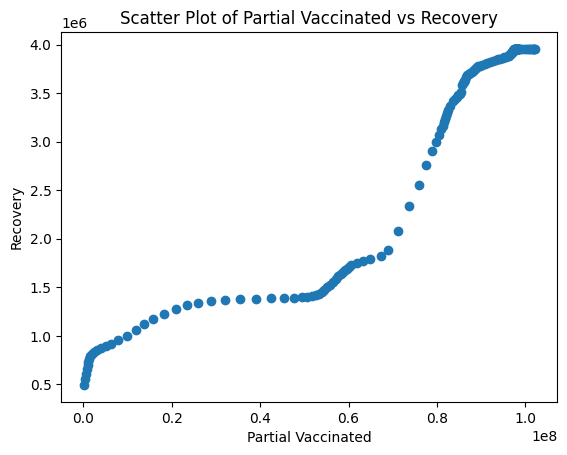

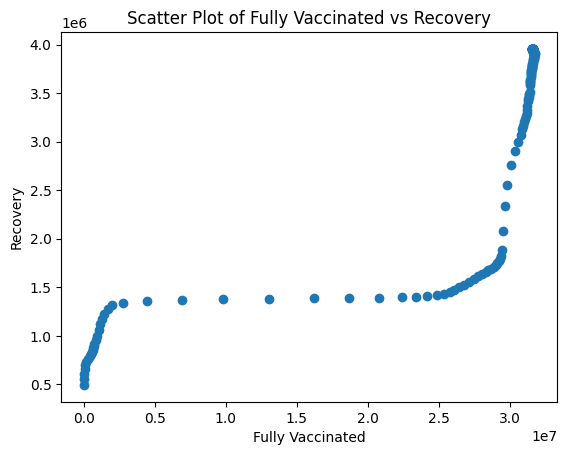

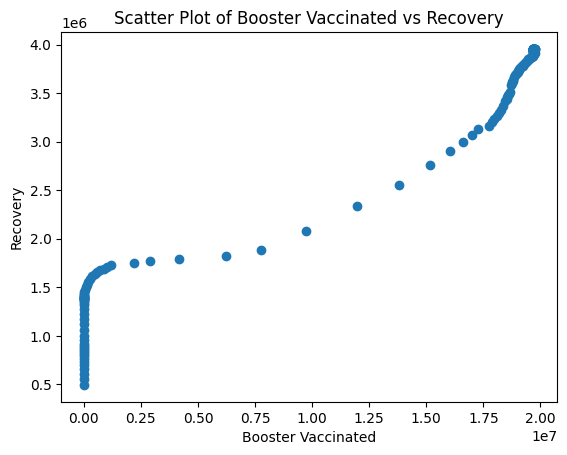

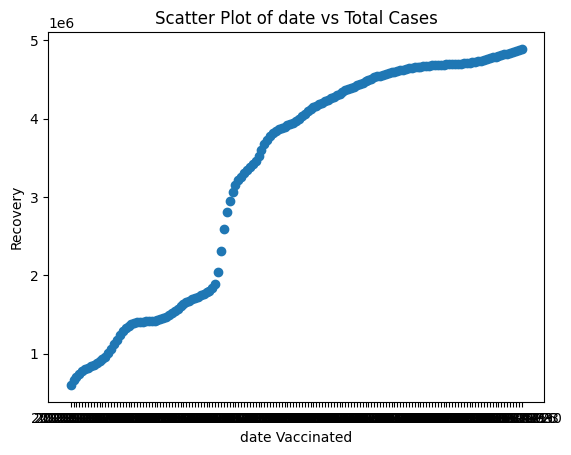

In [72]:
plt.scatter(summed_data['partial'] , summed_data['recovery'])
plt.xlabel('Partial Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Partial Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['fully'] , summed_data['recovery'])
plt.xlabel('Fully Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Fully Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['booster'] , summed_data['recovery'])
plt.xlabel('Booster Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Booster Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['date'] , summed_data['totalcases'])
plt.xlabel('date Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of date vs Total Cases')
plt.show()

# One-Class SVM Algorithm

We will discuss the outlier for vaccination status 

In [73]:
summed_data

,date,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,2021-01-02,599675,495066,15955,110118,3,0,0,0,0,0,0,0
1,2021-01-09,656408,552374,17020,300249,3941,0,56733,57308,1065,190131,3938,0
2,2021-01-16,704262,608068,18003,553819,20620,0,47854,55694,983,253570,16679,0
3,2021-01-23,741738,658971,19053,815195,54593,0,37476,50903,1050,261376,33973,0
4,2021-01-30,772321,700900,19909,968205,111205,0,30583,41929,856,153010,56612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2023-12-02,4844720,3954939,56724,101440992,31596053,19733320,11683,0,215,282948,706,7245
153,2023-12-09,4856586,3954939,56950,101693702,31594976,19738493,11866,0,226,252710,-1077,5173
154,2023-12-16,4868947,3954939,57132,101888153,31594521,19743667,12361,0,182,194451,-455,5174
155,2023-12-23,4880937,3954939,57311,102006204,31595524,19747995,11990,0,179,118051,1003,4328


In [74]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

x = summed_data[['partial','fully','booster']]
y = summed_data['totalcases']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [75]:
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(Xtrain,Ytrain)
predictions = clf.predict(Xtest)

print("The number of outlier is "+str(len(predictions[predictions == -1])))

# Identify outlier indices
outliers_indices = predictions == -1

# Extract outlier data points
outlier_data = Xtest[outliers_indices]

outlier_data = outlier_data.sort_index()
# Print or further analyze the outlier data
print("Outlier Data:")
print(outlier_data)

The number of outlier is 48
Outlier Data:
       partial     fully   booster
0       110118         3         0
2       553819     20620         0
3       815195     54593         0
13     6355667    733317        27
17    13782804   1153405        94
22    25983643   2786610       377
24    32086233   6893862       791
29    47661261  20801744      3893
30    49515689  22408293      6214
33    52563038  24851771     14789
37    55154715  26421787     87572
38    55906674  26797552    160770
41    57671217  27732389    376367
43    58717091  28291344    583059
44    59150324  28495260    723010
50    64937274  29305421   4188168
51    67290029  29390929   6228744
55    75828249  29808707  13812318
56    77588951  30069550  15182231
58    79783888  30579792  16603208
62    81657327  31020758  17862699
67    83009859  31244577  18340536
68    83596095  31290709  18444581
71    84782244  31346409  18589083
77    86212881  31444019  18794654
83    87878452  31504806  18997955
84    8808626

In [76]:
# import pandas as pd
# from sklearn.ensemble import IsolationForest

# # Load the dataset
# # summed_data = pd.read_csv('covid_FactTable.csv')

# # Select the relevant features for outlier detection
# features = ['totalcases', 'recovery', 'death', 'partial', 'fully', 'booster']
# X = summed_data[features]

# # Create an Isolation Forest object
# isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)

# # Fit the Isolation Forest model
# isolation_forest.fit(X)

# # Get the anomaly scores for each data point
# anomaly_scores = isolation_forest.decision_function(X)

# # Identify outliers based on a threshold
# outlier_threshold = -0.01
# outliers = summed_data[anomaly_scores < outlier_threshold]

# # Print the outliers
# print("Identified Outliers:")
# print(outliers)

In [77]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd


Read data and describe

In [78]:
df=pd.read_csv('covid_factTable.csv')
print(df.head(10))
print(df.describe())

   dateid  vacid  covidid        date province  totalcases  recovery  death  \
0       1      1        1  2021-01-02       BC       53162     42129    901   
1       1      2        2  2021-01-02       AB      104633     84827   1267   
2       1      3        3  2021-01-02       SK       15844     12975    158   
3       1      4        4  2021-01-02       MB       25026     19789    678   
4       1      5        5  2021-01-02       ON      193960    160526   4905   
5       1      6        6  2021-01-02       QC      204101    172047   7966   
6       1      7        7  2021-01-02       NL         390       372      4   
7       1      8        8  2021-01-02       NB         611       568      9   
8       1      9        9  2021-01-02       NS        1497      1399     65   
9       1     10       10  2021-01-02       PE          97        89      0   

   partial  fully  booster  totalcases_change  recovery_change  death_change  \
0    17510      0        0                  0     

# Data Transformation

Missing value - proceeded in Phase 2

Feature Selection

Categorization - Unavailable. All data are numeric

Data Normalization for recovery column

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Select the 'recovery' feature for normalization
recovery_feature = summed_data[['recovery','death']]

# Min-Max scaling
scaler = MinMaxScaler()
recovery_normalized = scaler.fit_transform(recovery_feature)

# Replace the original 'recovery' feature with the normalized values
summed_data[['recovery_normalized', 'death_normalized']] = recovery_normalized

# Drop the original 'recovery' feature if needed
# summed_data.drop(columns=['recovery'], inplace=True)

# Print or display the normalized 'recovery' feature
print("Normalized Recovery and death Feature:")
print(recovery_normalized)


Normalized Recovery and death Feature:
[[0.         0.        ]
 [0.01656361 0.02562868]
 [0.03266074 0.04928408]
 [0.04737313 0.0745518 ]
 [0.05949178 0.095151  ]
 [0.06924185 0.1106726 ]
 [0.07815085 0.12215137]
 [0.08519446 0.13030923]
 [0.09141665 0.13639755]
 [0.09735068 0.14183612]
 [0.10331651 0.14696186]
 [0.10940113 0.15148598]
 [0.11593836 0.15714114]
 [0.1232366  0.16188184]
 [0.13398064 0.16907713]
 [0.14696464 0.17725905]
 [0.16377191 0.18659608]
 [0.1803994  0.1959331 ]
 [0.19632744 0.20404283]
 [0.21150487 0.21099747]
 [0.22531983 0.21845747]
 [0.23652978 0.22495488]
 [0.24423931 0.22996029]
 [0.24926146 0.23311274]
 [0.25282922 0.23600048]
 [0.2551059  0.23821441]
 [0.256934   0.23987486]
 [0.25814185 0.24148719]
 [0.25915229 0.24273854]
 [0.26005261 0.24382144]
 [0.26087403 0.24463963]
 [0.26200933 0.24536157]
 [0.26367875 0.24605944]
 [0.26638319 0.24707015]
 [0.27100272 0.24904344]
 [0.27629945 0.2519793 ]
 [0.28277021 0.25597401]
 [0.29023204 0.26122007]
 [0.2983837

All province stop updating the recovery column since 2023-04-08, therefore recovery data will be same and result in same normalization afterward.

<AxesSubplot:>

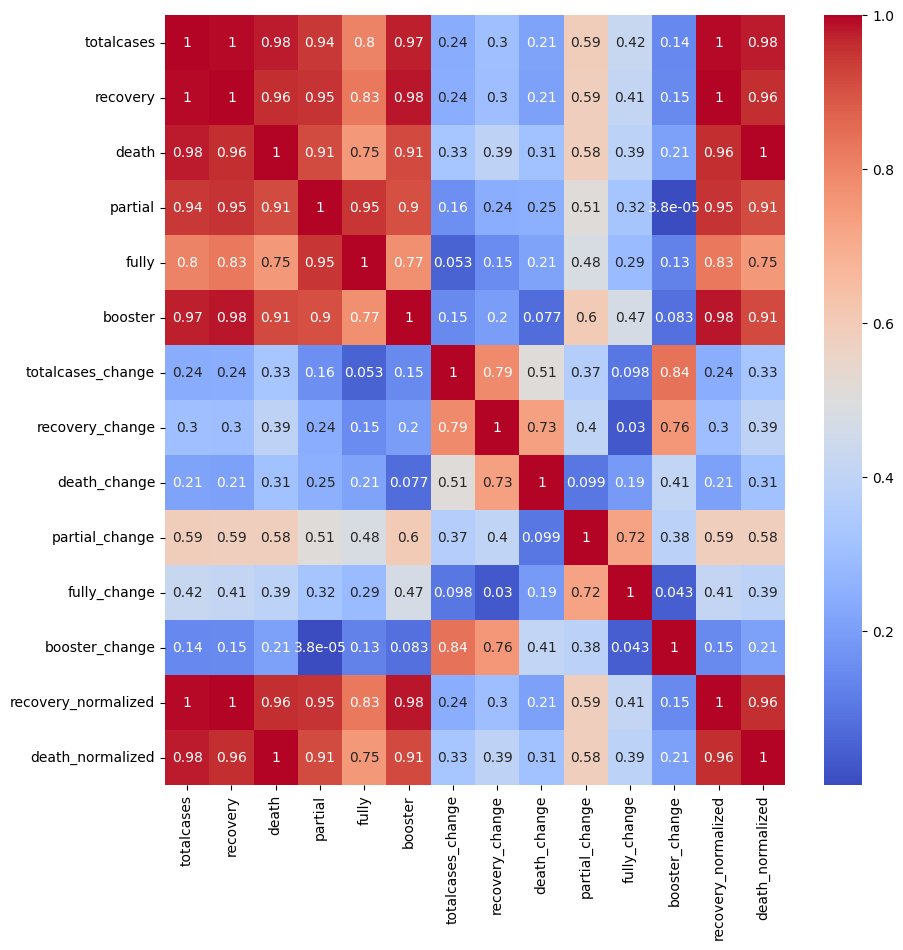

In [95]:
# summed_data = summed_data.drop(['recovery_normalized'],axis=1)
# summed_data = summed_data.drop(['death_normalized'],axis=1)

cor_matrix = summed_data.corr().abs()  # .abs()是取绝对值
plt.figure(figsize= (10,10))
sns.heatmap(cor_matrix,annot=True, cmap='coolwarm')

## Correlation-based Feature Selection ##

C:\Users\Martin Lin\AppData\Local\Temp\ipykernel_15968\2047694350.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

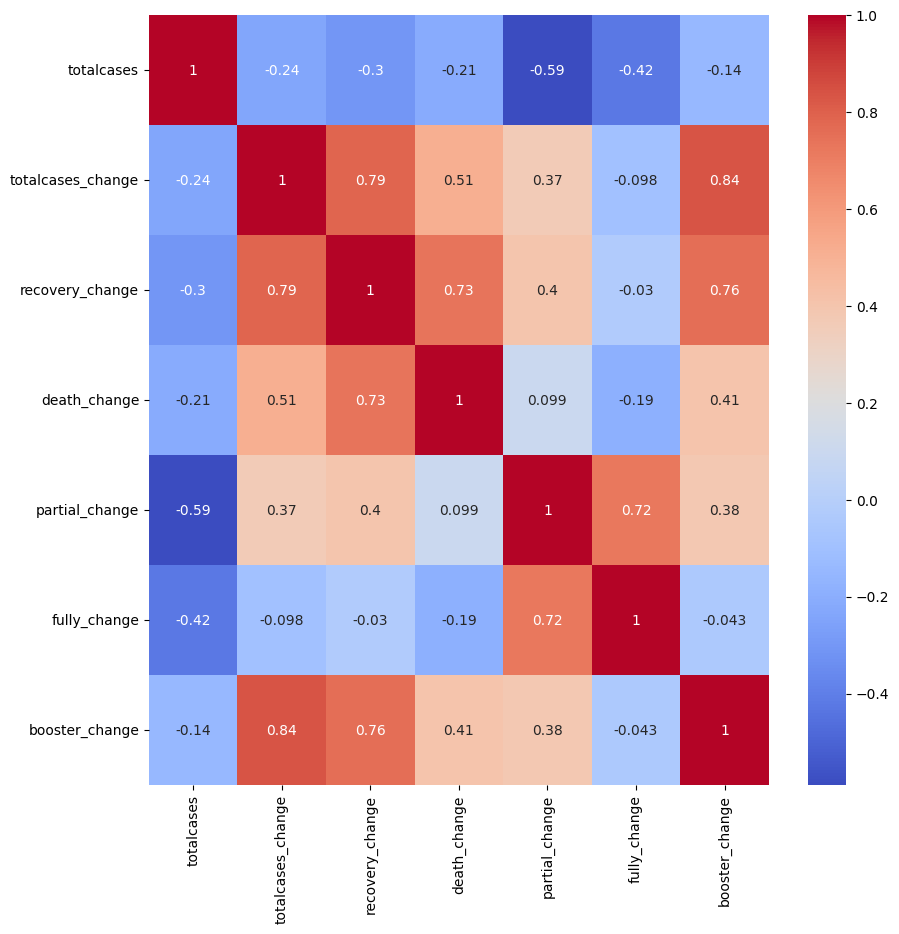

In [99]:
#选出全部是数字的列
summed_numerical_data = summed_data.select_dtypes(include=[np.number])
# summed_data["defalut"]=100
# summed_numerical_data=summed_data.select_dtypes(include=[np.number])
# varThresh = VarianceThreshold(threshold=0)
# varThresh = varThresh.fit(summed_numerical_data)
# varThresh = varThresh.get_support()
# print(varThresh)



upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
cor_matrix_reduced = summed_numerical_data.drop(to_drop, axis=1)




plt.figure(figsize= (10,10))
sns.heatmap(cor_matrix_reduced.corr(),annot=True,cmap='coolwarm')


## Variance Threshold Feature Selection

<AxesSubplot:>

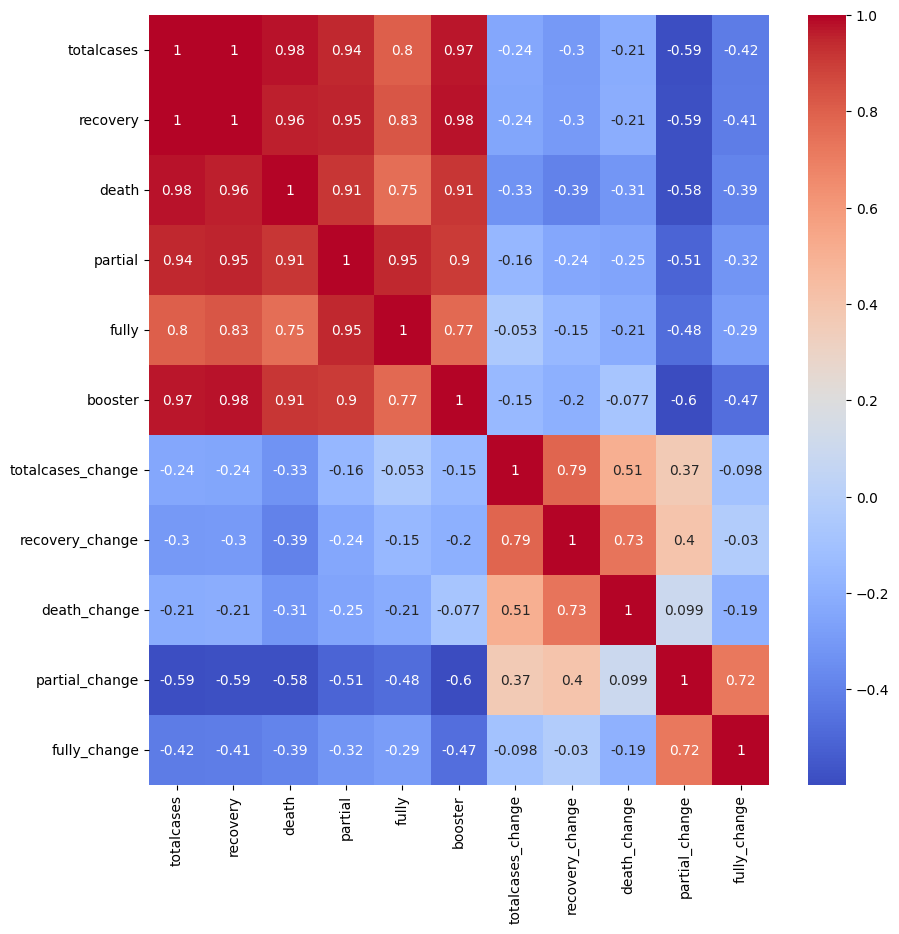

In [104]:
# Create VarianceThreshold object with a specified threshold
# This will remove all features with variance less than the threshold value
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit to data and then transform it
X_reduced = sel.fit_transform(summed_numerical_data)

# To get the indices of the features retained
features = sel.get_support(indices=True)

# To get the reduced DataFrame with selected features (if working with a DataFrame)
df_reduced = summed_data.iloc[:, features]

plt.figure(figsize= (10,10))
sns.heatmap(df_reduced.corr(),annot=True,cmap='coolwarm')



## pipeline

In [108]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

AttributeError: 'DataFrame' object has no attribute 'images'

# Histogram

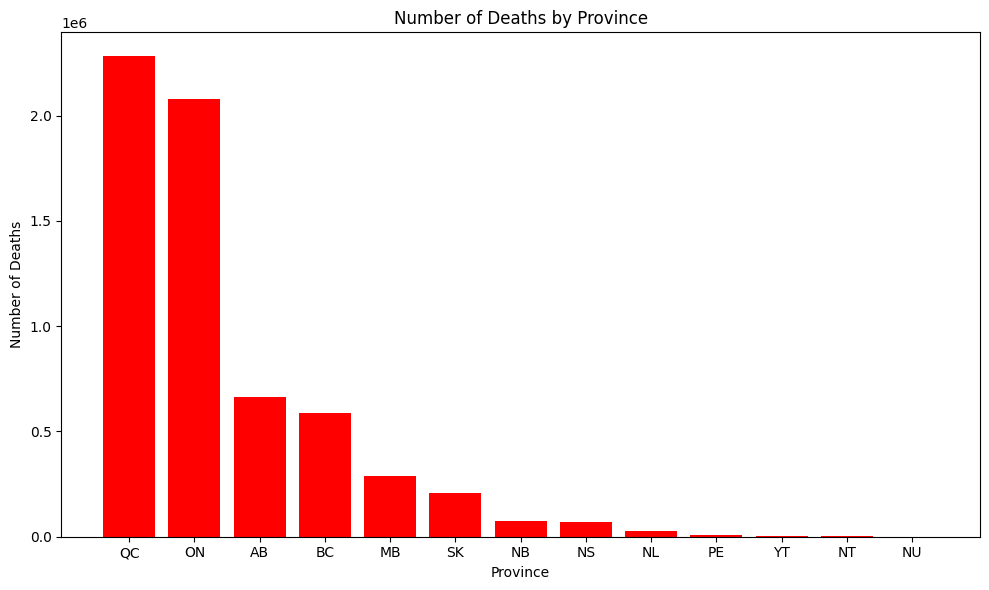

In [83]:
deaths_per_province = df.groupby('province')['death'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='death', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['death'], color='red')

plt.title('Number of Deaths by Province')
plt.xlabel('Province')
plt.ylabel('Number of Deaths')
 

# Show the plot
plt.tight_layout()  
plt.show()

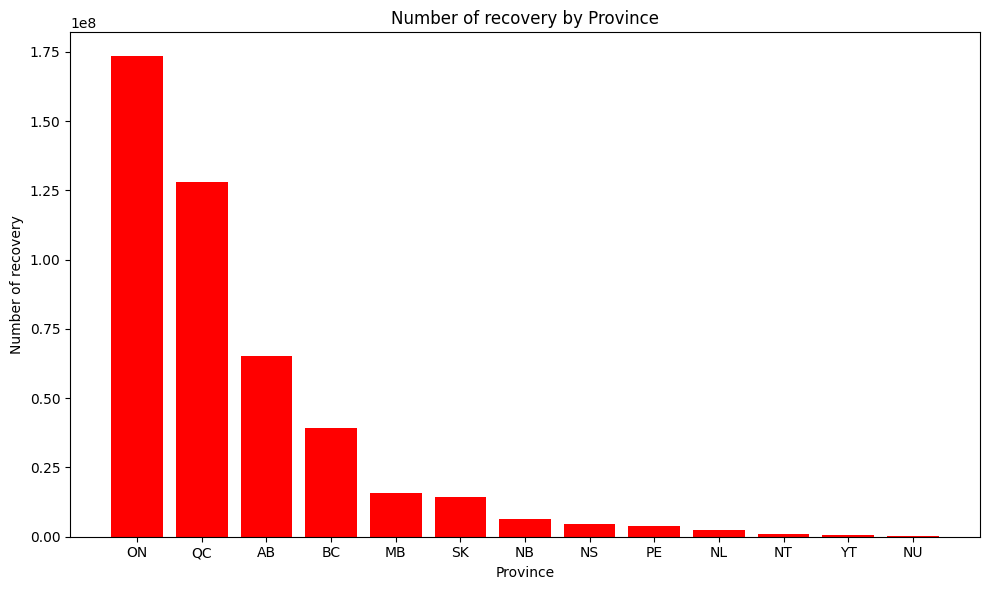

In [84]:
deaths_per_province = df.groupby('province')['recovery'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='recovery', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['recovery'], color='red')

plt.title('Number of recovery by Province')
plt.xlabel('Province')
plt.ylabel('Number of recovery')


# Show the plot
plt.tight_layout()  
plt.show()

### Vaccination in different provinces

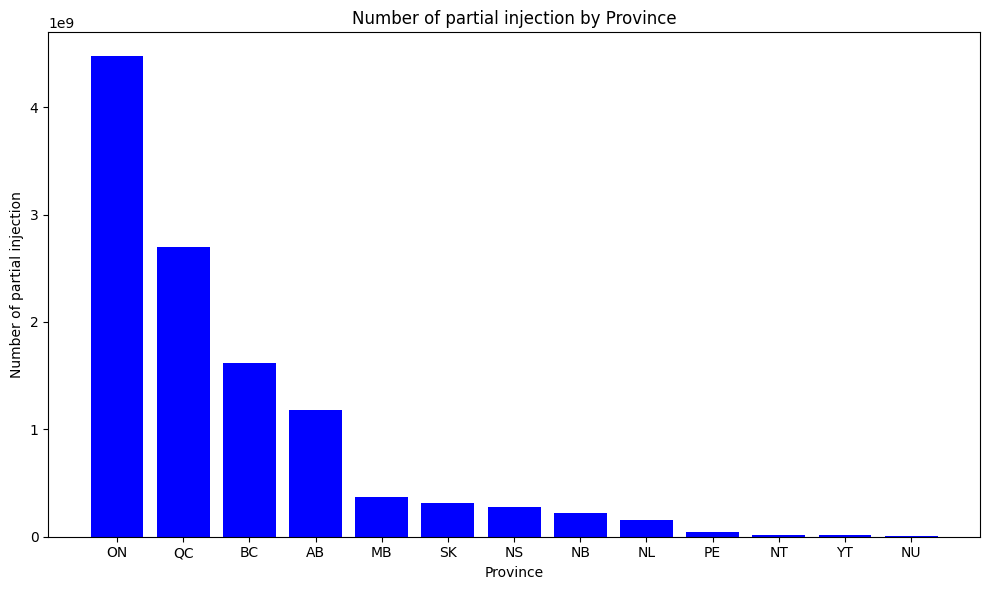

In [85]:
deaths_per_province = df.groupby('province')['partial'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='partial', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['partial'], color='blue')

plt.title('Number of partial injection by Province')
plt.xlabel('Province')
plt.ylabel('Number of partial injection')


# Show the plot
plt.tight_layout()  
plt.show()

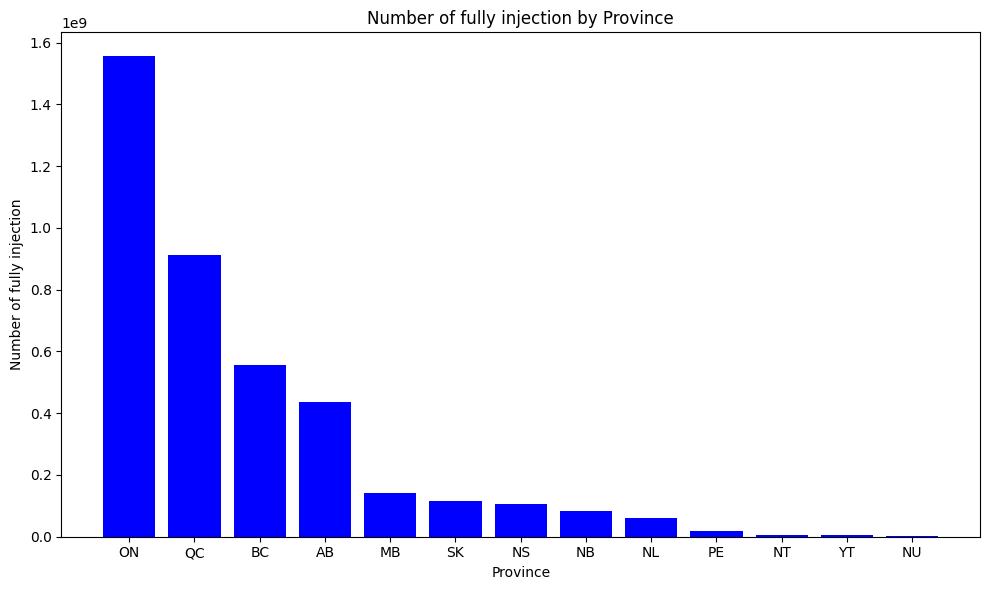

In [86]:
deaths_per_province = df.groupby('province')['fully'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='fully', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['fully'], color='blue')

plt.title('Number of fully injection by Province')
plt.xlabel('Province')
plt.ylabel('Number of fully injection')


# Show the plot
plt.tight_layout()  
plt.show()

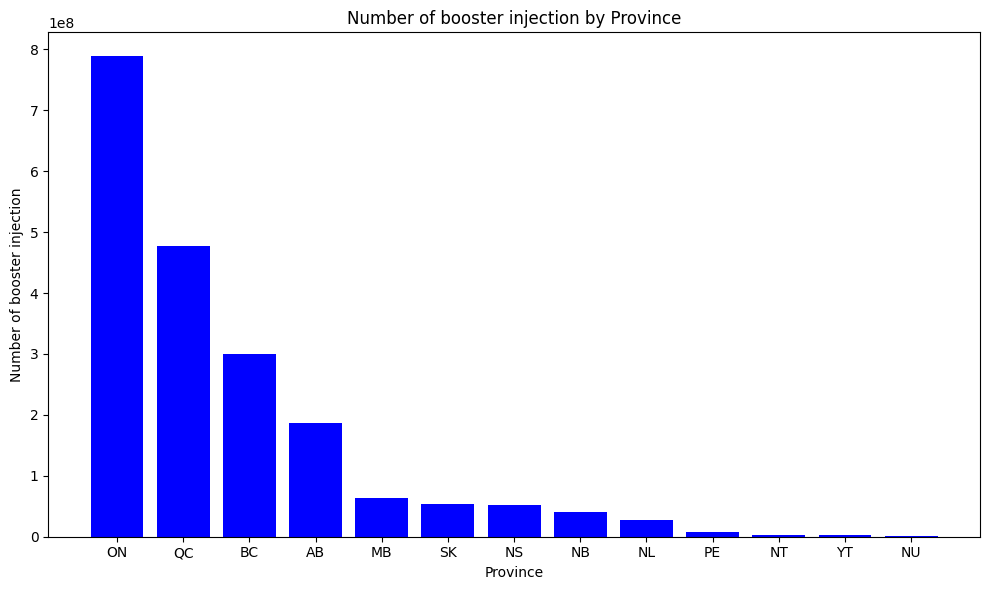

In [87]:
deaths_per_province = df.groupby('province')['booster'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='booster', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['booster'], color='blue')

plt.title('Number of booster injection by Province')
plt.xlabel('Province')
plt.ylabel('Number of booster injection')


# Show the plot
plt.tight_layout()  
plt.show()